<a href="https://colab.research.google.com/github/Sudip-Paul-03/EDA_AIRBNB_Booking_Analysis/blob/main/Sudip_Paul_EDA_ON_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airbnb_Logo_Bélo.svg

# **AirBnb Booking Analysis**    -


##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Sudip Paul
##### **Team Member 2 -** Bhupesh
##### **Team Member 3 -** Pooja Bramhavanshi
##### **Team Member 4 -** Sharik
##### **Team Member 5 -** Siddharth

# **Project Summary -**

## Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
#This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **GitHub Link -**

https://github.com/Sudip-Paul-03/EDA_AIRBNB_Booking_Analysis

# **Problem Statement**


We are going to explore the AIRBNB bookings data of New York city in 2019 and we will see at what price range, which types of properties are booked, what is the most popular neighbourhood group and where the revenue is maximum?

#### **Define Your Business Objective?**

We have got a set of data, in this data I am going to look into the price of booking of AIRBNBs in different neighbourhood area and then we are going to decide what typpe of property in New York in which area can generate maximum revenue for any hosts.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import missingno as msno # searched from google
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/EDA Project/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Dataset last five row look
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'we have total {df.shape[0]} rows and {df.shape[1]} columns.')

we have total 48895 rows and 16 columns.


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
NO_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {NO_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index':'columns',0:'null values'})

,columns,null values
0,last_review,10052
1,reviews_per_month,10052
2,host_name,21
3,name,16
4,id,0
5,host_id,0
6,neighbourhood_group,0
7,neighbourhood,0
8,latitude,0
9,longitude,0


In [10]:
Non_null_df = df.notnull().sum().reset_index().rename(columns = {'index' : 'columns', 0 : "Non-Null Values"})

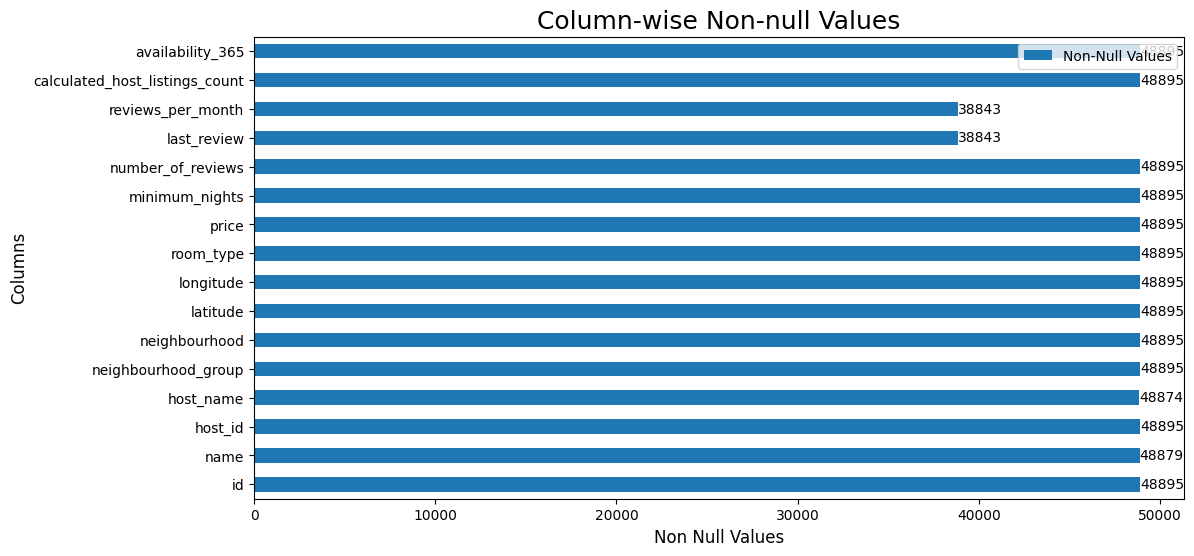

In [11]:
# Visualizing the missing values
ax = Non_null_df.plot(kind = 'barh', x = 'columns', figsize=(12,6))
ax.bar_label(ax.containers[0])
plt.ylabel('Columns', {'fontsize': 12, 'fontweight': 15})
plt.xlabel("Non Null Values", {'fontsize': 12, 'fontweight': 15})
plt.title('Column-wise Non-null Values',{'fontsize': 18, 'fontweight': 20})
plt.show()

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Checking unique values for each varaible .

In [14]:
# Check Unique Values for each variable.
def unique_values(dF):
    unique_vals = []
    for col in dF.columns:
        unique_vals.append(dF[col].unique())

    return unique_vals

In [15]:
unique_values(df)

[array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245]),
 array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
        'THE VILLAGE OF HARLEM....NEW YORK !', ...,
        'Sunny Studio at Historical Neighborhood',
        '43rd St. Time Square-cozy single bed',
        "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object),
 array([     2787,      2845,      4632, ..., 274321313,  23492952,
         68119814]),
 array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
        'Ilgar & Aysel'], dtype=object),
 array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
       dtype=object),
 array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
        'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
        'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
        'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
        'Park Slope', 'Windsor Terrace', 'Inwood', 'East Vill

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# making acopy of dataframe.
airbnb = df.copy()

In [17]:
# filling na values
airbnb.fillna({'reviews_per_month':0},inplace=True)
airbnb.fillna({'host_name':'Not Mentioned'}, inplace = True)

In [18]:
#dropping columns that are not significant for our future data exploration and predictions
airbnb.drop(['id','last_review','name'],axis=1,inplace=True)

<Axes: xlabel='price', ylabel='minimum_nights'>

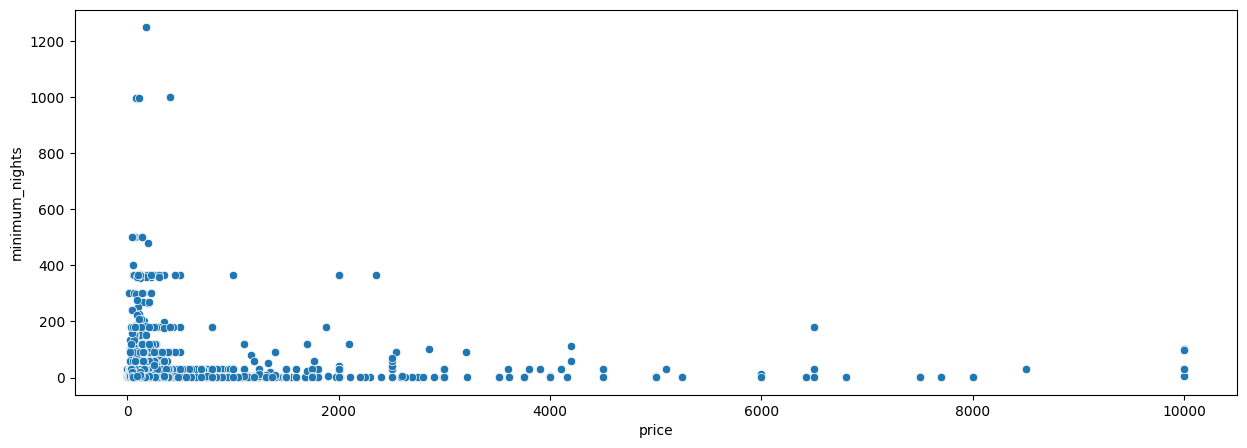

In [19]:
#let's heck the reltionship between the numerical variables

#set up figure size
plt.figure(figsize=(15,5))
# plot scatterplot
sns.scatterplot( y='minimum_nights', x='price', data=airbnb)

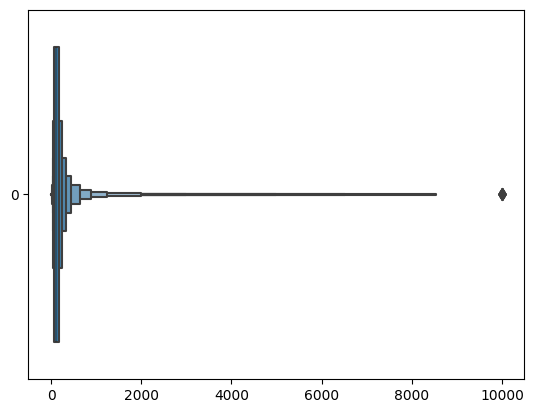

In [20]:
sns.boxenplot(airbnb['price'],orient='horizontal')

plt.show()

In [21]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
#Let's remove the outliers from the price column

# Select the column where you want to remove outliers
column_name = 'price'

# Calculate the IQR and define the threshold
q1 = airbnb[column_name].quantile(0.25)
q3 = airbnb[column_name].quantile(0.75)
iqr = q3 - q1
threshold = 1.5

# Remove the outliers
filtered_airbnb = airbnb[(airbnb[column_name] >= q1 - threshold*iqr) & (airbnb[column_name] <= q3 + threshold*iqr)]

<Axes: >

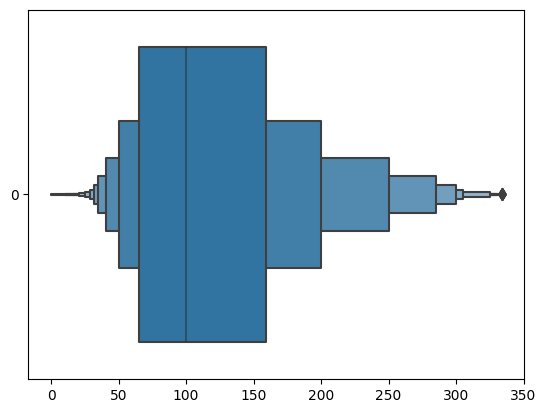

In [23]:
#Now, let’s check the boxen plot once again as by now I have removed the outliers.
sns.boxenplot(filtered_airbnb['price'],orient='horizontal')

<Axes: xlabel='price', ylabel='Density'>

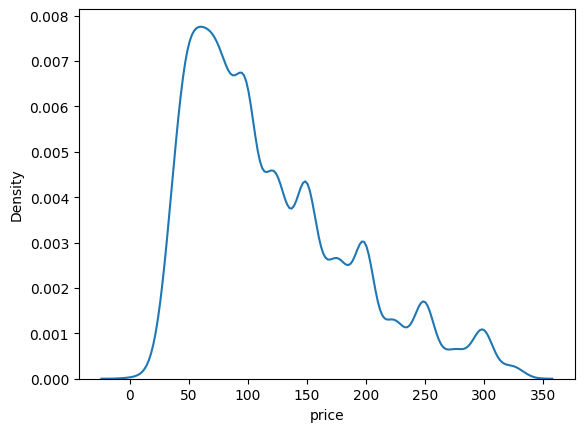

In [24]:
#distribution of price after removing outliers

# plot kdeplot
sns.kdeplot(filtered_airbnb['price'])

In [25]:
# Lets add a new column named Price range

# Lets define a new column named Price range

def get_price_range(pr):
  if pr>= 0 and pr<50:
    price_range = "0-50"
  elif pr>= 50 and pr<100:
    price_range = "50-100"
  elif pr>= 100 and pr<150:
    price_range = "100-150"
  elif pr>= 150 and pr<200:
    price_range = "150-200"
  elif pr>= 200 and pr<250:
    price_range = "200-250"
  elif pr>= 250  and pr<300:
    price_range = "250-300"
  else:
    price_range = ">300"
  return price_range

In [26]:
# Lets add a new column named Price range
airbnb['price_range'] = airbnb.apply(lambda x: get_price_range(x['price']), axis= 1)

In [27]:
#check the dataset now
airbnb.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,100-150
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,200-250
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,150-200
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,50-100
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,50-100


In [28]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
#checking our all new data frame info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

### What all manipulations have you done and insights you found?

We hav removed columns which are not reqiored for us in the analysis and also we have removed outliers of extreme price values in both end.
We have also added one extra column named price range to simplify our dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

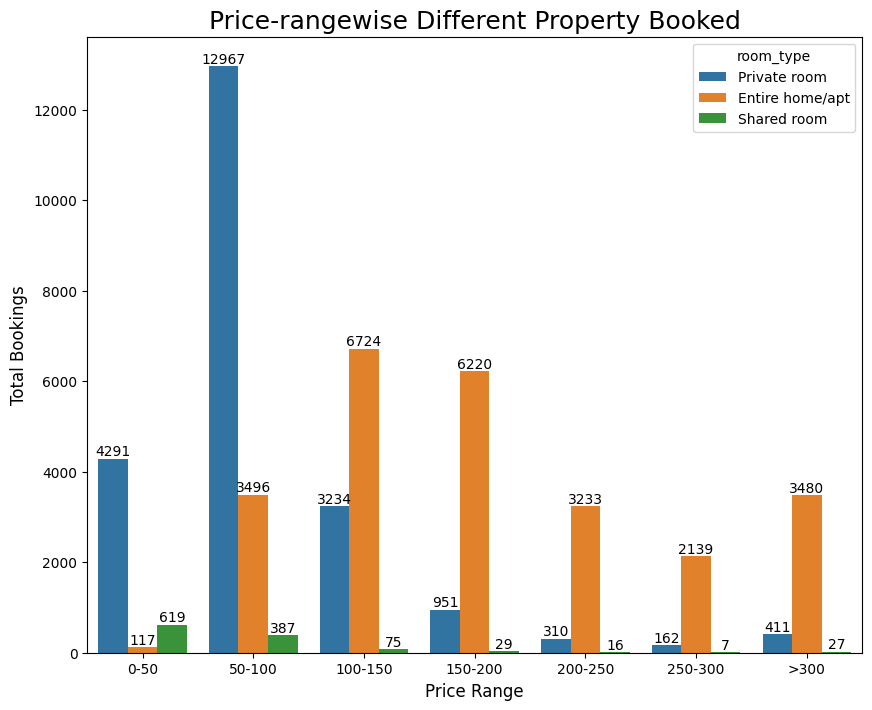

In [52]:
# Chart - 1: Total Properties Booked in Different Price Range.

#set the plot figure size
plt.figure(figsize=(10,8))

#set the plot title
plt.title('Price-rangewise Different Property Booked',{'fontsize': 18, 'fontweight': 20})

#set the order
desired_order = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '>300']

#plot the chart
tb = sns.countplot(x='price_range', hue= 'room_type', data=airbnb, order = desired_order)



#set the label
plt.ylabel("Total Bookings", {'fontsize': 12, 'fontweight': 15})
plt.xlabel('Price Range', {'fontsize': 12, 'fontweight': 15})

# labelling of each bars in the plot
for container in tb.containers:
    tb.bar_label(container)

#show plot

plt.show()

##### 1. Why did you pick the specific chart?

This chart has been choosen to see the distribution of diiferent properties type in different price range, this will give an inside of availability of different rooms and we will get the inside at each price range what is the number of airbnb that are available.

##### 2. What is/are the insight(s) found from the chart?

###### For private rooms, Within the 50-100 dollars price range we observe that they are booked the most and the number of bookings is highest (12967) among all the catagories. The number of bookings in 0-50 dollars (4291) and 100-150 dollars (3496) price range are also having a high number of bookings but in the higher price range (more than 150 dollars range) the number of bookings for private room type decreases significantly.

###### We can conclude that private rooms are relatively affordable mode of accomodation and also they also provide privacy so we see most of the booking in 0-150 dollars price range.

###### For the Entire home/apt type of property, we see relatively lesses number of bookings in the lowest price range of 0-50 dollars (117) range while the number of bookings in the rest of the price range in almost uniform and the no of bookings maximizes in 100-150 and 150-200 dollars range (both has over 6000 bookings).

###### From this distribution data it is evident that the entire home/apartments are the most luxurious type of accomodation so their bookings stands in comparatively higher price point as compared to others.

###### From the porperty distribution chart according to price range we can see that out of all the different room types, the shared rooms are mostly abundant in lower price range. The number of shared rooms within 0-50 price range is highest (619) and it is almost half (387) in 50-100 price range and the total number of properties booked in more than 100 dollars price range in less than 150.
###### So we can conclude that guests usually don't like to spend much money in an shared type of accomodation as it is viewed as most affordable option of staying.



#### Chart - 2

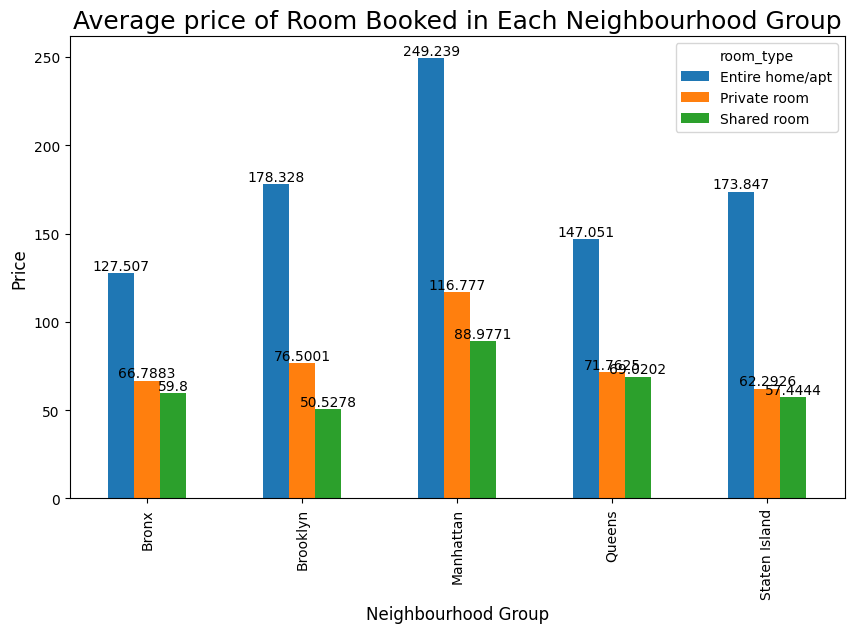

In [41]:
# Chart - 2 Room Tyoe-wise Average Price of Rooms Booked in Each Neighbourhood

mp = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind = 'bar', figsize= (10,6))

plt.title('Average price of Room Booked in Each Neighbourhood Group', {'fontsize': 18, 'fontweight': 20})

plt.xlabel('Neighbourhood Group', {'fontsize': 12, 'fontweight': 15})
plt.ylabel('Price', {'fontsize': 12, 'fontweight': 15})

#  labels for each bar
for container in mp.containers:
    mp.bar_label(container)

# show chart
plt.show()

##### 1. Why did you pick the specific chart?

With this chart we can see thre avarage price of diiferent properties in the different neighbourhood group.


##### 2. What is/are the insight(s) found from the chart?

###### As predicted in the previous queries we can see that the average price of the entire home/ apartments are the highest and it is significantly higher than the other two options.
###### While the average price of private rooms are higher than share room types, the difference between the two are very low. So we see a large number of bookings in the private room types as compared to the shared room types as in private rooms, the guests has the added benifit of privacy in almost similar prices.
###### From this barplot we can also see that in all room types the Manhattan area is much more expensive as compared to the other locations, while in the rest of the locations the average price of rooms are almost similar. This further backs up our previous statement of Manhattan being the most expensive location.

#### Chart - 3

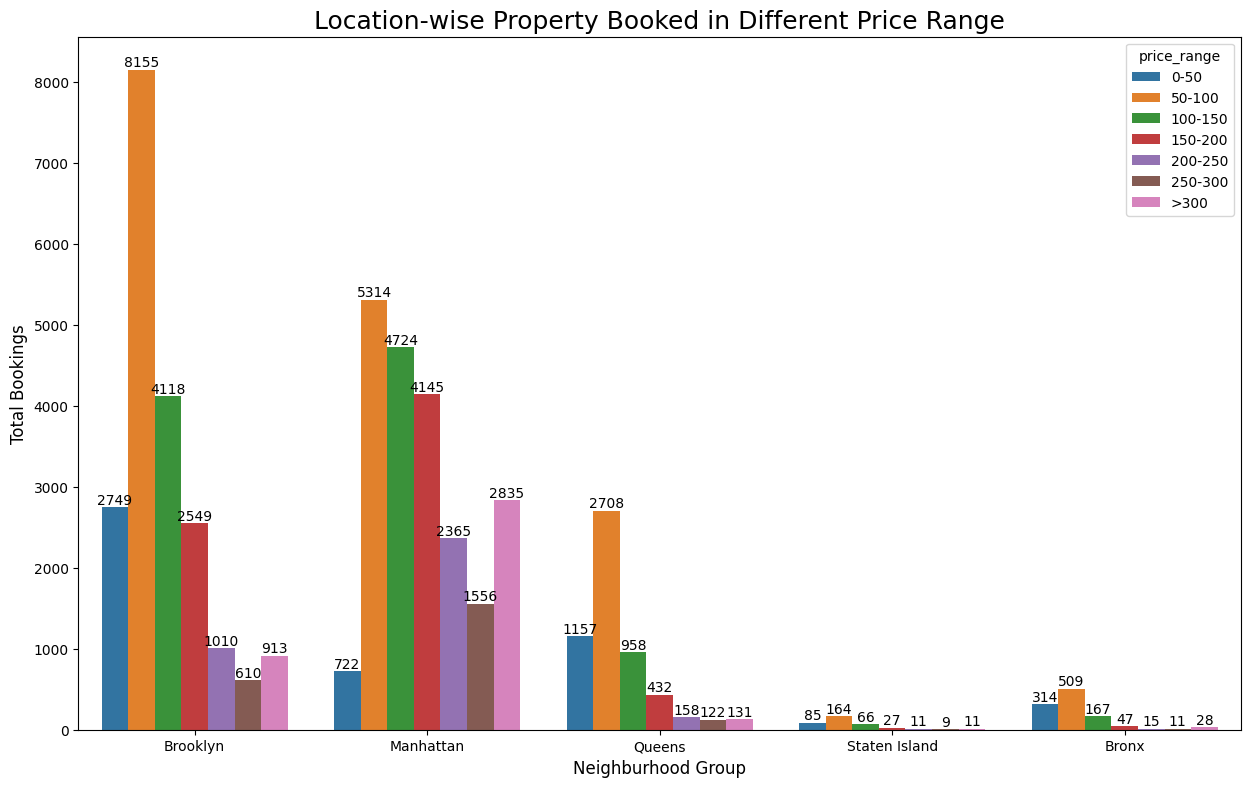

In [50]:
# Chart - 3: Location-wise Distribution of Property in Different Price Range.

# set figure size
plt.figure(figsize=(15,9))

# set plot title
plt.title('Location-wise Property Booked in Different Price Range',{'fontsize': 18, 'fontweight': 20})

# set the order
desired_order = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '>300']

# plot countplot
ldr = sns.countplot(x='neighbourhood_group', hue= 'price_range',width = 0.8, data=airbnb, hue_order = desired_order)

# labelling of each bars in the plot
for container in ldr.containers:
    ldr.bar_label(container)

# set x-axis and y-axis labels
plt.ylabel("Total Bookings", {'fontsize': 12, 'fontweight': 15})
plt.xlabel('Neighburhood Group', {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

Here we can see the total no of bookings in each neighbourhood group in each price range.

##### 2. What is/are the insight(s) found from the chart?

###### We can see that in all the locations, the properties within the price range of 50-100 dollars are the most booked properties followed by the properties in 0-50 dollars price range. But in case of **Manhattan** we can see that properties in higher price range are almost as popular as the 50-100 dollar range. So this further concludes our previous scatterplot statement of Manhattan being the most expensive location.

#### Chart - 4

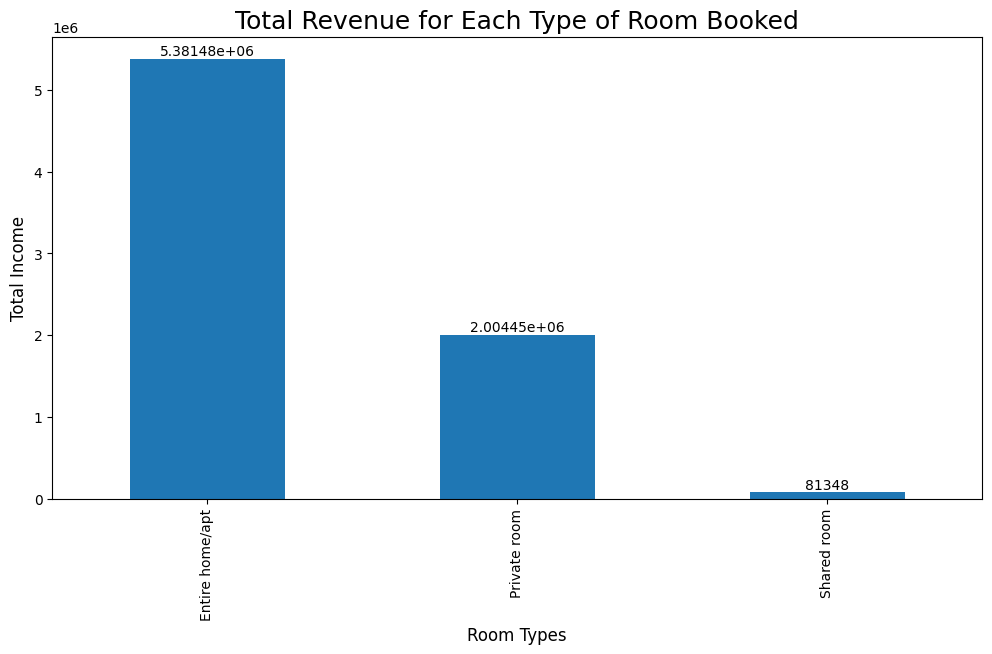

In [49]:
# Chart - 4: Room-type-wise Total price for each neighbourhood group.

# define a new dataset for total revenue
total_revenue = airbnb.groupby(['room_type'])['price'].sum()

# plot the dataset
ti = total_revenue.plot(kind = 'bar', figsize= (12,6))

# set plot title
plt.title('Total Revenue for Each Type of Room Booked', {'fontsize': 18, 'fontweight': 20})

# set x-axis and y-axis labels
plt.ylabel('Total Income', {'fontsize': 12, 'fontweight': 15})
plt.xlabel('Room Types', {'fontsize': 12, 'fontweight': 15})

#  labels for each bar
for container in ti.containers:
    ti.bar_label(container)

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We have to check the total income generated by each type of rooms.


##### 2. What is/are the insight(s) found from the chart?

We can see that the entire home/apartment is the most popular mode of bookinhg and it also generates the most money, followed by private rooms which also generates a good amount of money but the share room types properties are the least popular and also generates the least money.

#### Chart - 5

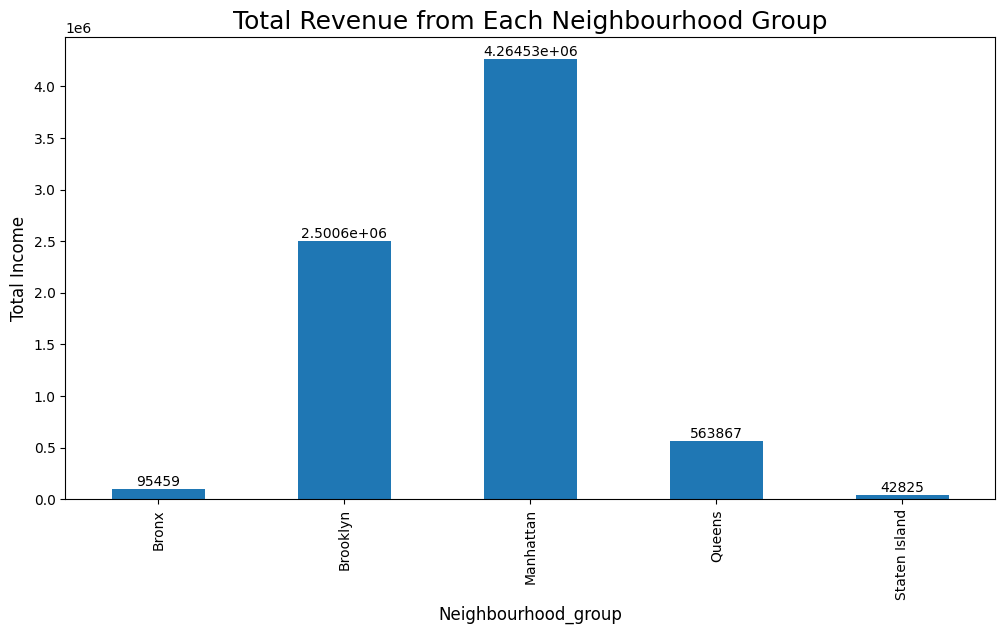

In [48]:
# Chart - 5: Neighbourhood group-wise Total price for each neighbourhood group.

# define a new dataset for total revenue
total_revenue = airbnb.groupby(['neighbourhood_group'])['price'].sum()

# plot the dataset
tn = total_revenue.plot(kind = 'bar', figsize= (12,6))

# set plot title
plt.title('Total Revenue from Each Neighbourhood Group', {'fontsize': 18, 'fontweight': 20})

# set x-axis and y-axis labels
plt.ylabel('Total Income', {'fontsize': 12, 'fontweight': 15})
plt.xlabel('Neighbourhood_group', {'fontsize': 12, 'fontweight': 15})

#  labels for each bar
for container in tn.containers:
    tn.bar_label(container)

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We have to check the total revenue generated in each neighbourhood area.

##### 2. What is/are the insight(s) found from the chart?

We can see that Manhattan generates the most amount of revenue followed by Brooklyn and Queens. The revenue in Bronx and Staten Island is very minimal as compared to the rest.

#### Chart - 6

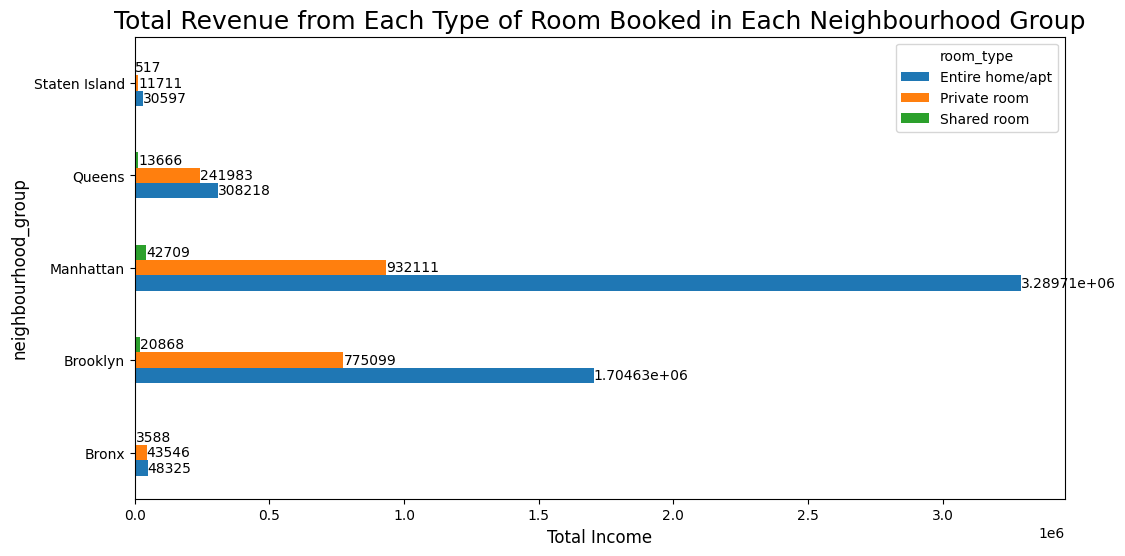

In [51]:
# Chart - 6: Room-type-wise Total price for each neighbourhood group.

# define a new dataset for total revenue
total_revenue = airbnb.groupby(['neighbourhood_group','room_type'])['price'].sum().unstack()

# plot the dataset
tr = total_revenue.plot(kind = 'barh', figsize= (12,6))

# set plot title
plt.title('Total Revenue from Each Type of Room Booked in Each Neighbourhood Group', {'fontsize': 18, 'fontweight': 20})

# set x-axis and y-axis labels
plt.xlabel('Total Income', {'fontsize': 12, 'fontweight': 15})
plt.ylabel('neighbourhood_group', {'fontsize': 12, 'fontweight': 15})

#  labels for each bar
for container in tr.containers:
    tr.bar_label(container)

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

###### This chart will help us to understand the the total revenue that is generating in each neighbourhood group for each property types.

##### 2. What is/are the insight(s) found from the chart?

###### In terms of revenue generated from AIRBNB, we can see that the Manhattan location generated the most amount of money as already we have seen in problem number 3 and problem number 4, that Manhattan sees the most number of bookings and the price range of bookings is higher at this location.

###### Brooklyn is the second most revenue generating location and Queens is third in the list and as the trend of number of bookings indicates, the revenue generated from Bronx and Staten Island locations are the lowest.

## ***5. Solution to Business Objetives***

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

From the above datasets we can see that the most revenue is generated from the entire home/apartment types of property, while the neighbourhood area that is the most revenue generating is Manhattan followed by Brooklyn and Queens.
The avarage price of entire home/apartment types of properties in Manhattan area is around 250 dollars but the total no of bookings in this type of properties is consistent throughout 100 dollars to 300 dollars range.
Wile the private room type of properties are more popular in lower price rnge of 0-100 dollars.

# ***Conclusion***

So, for a business in New York City the best neighbourhood group to have a AIRBNB is Manhattan followed by Brooklyn and the property type should be either an enire home/apartment or private rooms. For private rooms the price of the room has to be in the lower range of 0-100 dollars while a good apartment/home can generate somewhere between 150-300 dollars consistently.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***